In [22]:
import pandas as pd
import analysis_util
import matplotlib.pyplot as plt
from inspect_util import Chunk
from inspect_util import remove_empty_lines
from inspect_util import normalize_lines

In [2]:
df = pd.read_csv('data/resolution_composition.csv')
print(len(df))
df.head()

13573


,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [3]:
df_po = pd.read_csv('data/partial_order_result.csv')
df = pd.merge(df, df_po, on='chunk_id', how='inner', suffixes=('', ''))
df.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5


In [4]:
malformed_chunks = pd.read_csv('data/malformed_chunks.csv')
malformed_chunks = malformed_chunks['chunk_id'].unique()
print(f'Removing {len(malformed_chunks)} malformed chunks')
df = df[~df['chunk_id'].isin(malformed_chunks)]
print(f'Total number of chunks: {len(df)}')

Removing 264 malformed chunks
Total number of chunks: 13309


In [5]:
# remove imprecise resolutions
df = df[df['v1_percentage']!= -1]
print(len(df))

10726


In [6]:
df.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.072600e+04,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000,10726.000000
mean,1.112637e+06,0.554077,0.532096,0.510967,0.489010,0.086037,1.786407,2.194387,32.210539,36.544740,6.668842,6.886537,0.217695,15.056219,8.379079
std,2.206786e+05,0.319618,0.321639,0.304942,0.304911,0.197732,6.677797,10.272872,29.916529,31.037321,29.755920,32.439524,20.253426,67.030846,35.503146
min,7.766620e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-388.000000,2.000000,1.000000
25%,9.467838e+05,0.330000,0.330000,0.330000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,-2.000000,4.000000,2.000000
50%,1.079836e+06,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,33.330000,40.000000,2.000000,3.000000,0.000000,6.000000,3.000000
75%,1.293377e+06,0.810000,0.800000,0.710000,0.670000,0.000000,1.000000,2.000000,50.000000,50.000000,5.000000,5.000000,2.000000,12.000000,7.000000
max,1.658666e+06,1.000000,1.000000,1.000000,1.000000,1.000000,353.000000,689.000000,100.000000,100.000000,1352.000000,1402.000000,1401.000000,2922.000000,1557.000000


In [11]:
df[df['v1_percentage'] == 0.5].describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,2.798000e+03,2798.0,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000
mean,1.110030e+06,0.5,0.522659,0.488774,0.511222,0.022663,1.082202,1.290207,36.889207,41.326594,2.314153,2.781272,0.467119,5.434954,2.802001
std,2.291095e+05,0.0,0.091857,0.045725,0.045707,0.091874,2.061366,4.097330,24.915539,22.923656,2.696603,10.182569,9.460576,13.172648,8.309019
min,7.769180e+05,0.5,0.500000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-48.000000,3.000000,2.000000
25%,9.366412e+05,0.5,0.500000,0.500000,0.500000,0.000000,0.000000,1.000000,0.000000,40.000000,2.000000,2.000000,0.000000,3.000000,2.000000
50%,1.080226e+06,0.5,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,50.000000,50.000000,2.000000,2.000000,0.000000,4.000000,2.000000
75%,1.301501e+06,0.5,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,50.000000,50.000000,2.000000,2.000000,1.000000,5.000000,2.000000
max,1.658666e+06,0.5,1.000000,0.500000,0.750000,0.500000,49.000000,189.000000,98.000000,95.450000,68.000000,510.000000,473.000000,628.000000,407.000000


In [13]:
df[df['v2_percentage'] == 0.5].describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,2.787000e+03,2787.000000,2787.0,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000
mean,1.110298e+06,0.520111,0.5,0.509921,0.490083,0.020111,1.033369,1.214209,36.295314,41.885802,2.379620,2.427341,0.047722,5.101543,2.641191
std,2.275649e+05,0.084700,0.0,0.042035,0.042020,0.084700,1.879337,1.728848,24.767617,22.659755,2.527974,2.192629,2.620030,4.563434,2.278933
min,7.769180e+05,0.500000,0.5,0.500000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-48.000000,3.000000,2.000000
25%,9.368660e+05,0.500000,0.5,0.500000,0.500000,0.000000,0.000000,1.000000,0.000000,50.000000,2.000000,2.000000,-1.000000,3.000000,2.000000
50%,1.082853e+06,0.500000,0.5,0.500000,0.500000,0.000000,1.000000,1.000000,50.000000,50.000000,2.000000,2.000000,0.000000,4.000000,2.000000
75%,1.300142e+06,0.500000,0.5,0.500000,0.500000,0.000000,1.000000,1.000000,50.000000,50.000000,2.000000,2.000000,1.000000,5.000000,2.000000
max,1.658666e+06,1.000000,0.5,0.750000,0.500000,0.500000,49.000000,30.000000,98.000000,95.450000,50.000000,45.000000,27.000000,85.000000,41.000000


In [14]:
chunks_of_interest = df[(df['v1_percentage'] == 0.5) | (df['v2_percentage'] == 0.5)]
chunks_of_interest

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
6,776918,0.50,0.5,0.50,0.50,0.00,v1 v2,1,1,50.0,50.0,2,2,0.0,True,4,2
7,776929,0.50,0.5,0.50,0.50,0.00,v1 v2,0,1,0.0,50.0,1,2,1.0,True,3,2
11,776951,0.50,0.5,0.50,0.50,0.00,v1 v2,1,0,50.0,0.0,2,1,-1.0,True,3,2
18,777222,0.50,0.5,0.50,0.50,0.00,v1 v2,1,0,50.0,0.0,2,1,-1.0,True,5,3
21,777218,0.50,0.5,0.50,0.50,0.00,v1 v2,1,1,50.0,50.0,2,2,0.0,True,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13556,1658413,0.75,0.5,0.62,0.38,0.25,v1 (v1_2) v1 v2,0,0,0.0,0.0,3,2,-1.0,True,5,4
13559,1658419,0.50,0.5,0.50,0.50,0.00,v1 v2,1,1,50.0,50.0,2,2,0.0,True,4,2
13567,1658665,0.50,0.5,0.50,0.50,0.00,v2 v1,1,1,50.0,50.0,2,2,0.0,True,4,3
13568,1658666,0.50,0.5,0.50,0.50,0.00,v2 v1,1,1,50.0,50.0,2,2,0.0,True,4,3


In [15]:
v1v2 = analysis_util.get_chunk_composition_pattern_data('v1 v2', chunks_of_interest)
v2v1 = analysis_util.get_chunk_composition_pattern_data('v2 v1', chunks_of_interest)
v1_only = analysis_util.get_chunk_composition_pattern_data('v1', chunks_of_interest)
v2_only = analysis_util.get_chunk_composition_pattern_data('v2', chunks_of_interest)
v1v2v1 = analysis_util.get_chunk_composition_pattern_data('v1 v2 v1', chunks_of_interest)
v2v1v2 = analysis_util.get_chunk_composition_pattern_data('v2 v1 v2', chunks_of_interest)
no_alternation = len(v1v2) + len(v2v1)
some_alternation = len(v1v2v1) + len(v2v1v2)
print(f'Only v1 lines: {len(v1_only)} ({(len(v1_only)/len(chunks_of_interest)*100):.2f}%)')
print(f'Only v2 lines: {len(v2_only)} ({(len(v2_only)/len(chunks_of_interest)*100):.2f}%)')
print(f'No alternation (v1v2): {len(v1v2)} ({(len(v1v2)/len(chunks_of_interest)*100):.2f}%)')
print(f'No alternation (v2v1): {len(v2v1)} ({(len(v2v1)/len(chunks_of_interest)*100):.2f}%)')
# print(f'No alternation (aggregate): {no_alternation} ({(no_alternation/len(df)*100):.2f}%)')
print(f'Some alternation (v1v2v1 or v2v1v2): {some_alternation} ({(some_alternation/len(chunks_of_interest)*100):.2f}%)')
easy_cases = no_alternation + some_alternation + len(v1_only) + len(v2_only)
remaining = len(chunks_of_interest) - easy_cases

print('-------------')
print(f'Easier cases (all above): {easy_cases} ({(easy_cases/len(chunks_of_interest)*100):.2f}%)')
print(f'Remaining (harder cases): {remaining} ({(remaining/len(chunks_of_interest)*100):.2f}%)')

Only v1 lines: 0 (0.00%)
Only v2 lines: 0 (0.00%)
No alternation (v1v2): 1436 (48.38%)
No alternation (v2v1): 1130 (38.07%)
Some alternation (v1v2v1 or v2v1v2): 33 (1.11%)
-------------
Easier cases (all above): 2599 (87.57%)
Remaining (harder cases): 369 (12.43%)


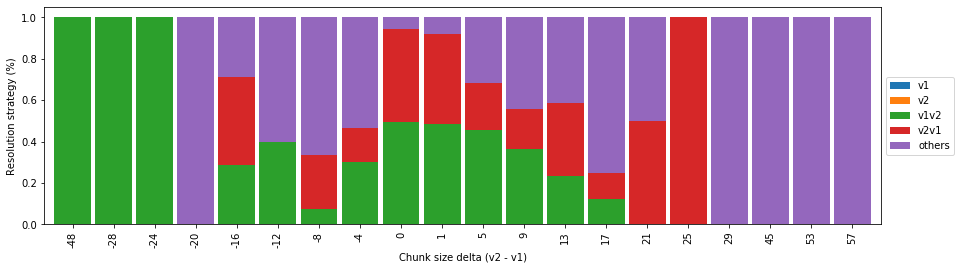

In [71]:
import importlib
importlib.reload(analysis_util)
df_plot = analysis_util.get_strategies_plot_df(chunks_of_interest, v1_only, v2_only, v1v2, v2v1, 'chunk_size_delta')
# display(df_plot.tail())
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='delta', stacked=True, width=0.90, ax = ax)
ax.set_ylabel("Resolution strategy (%)")
ax.set_xlabel("Chunk size delta (v2 - v1)")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

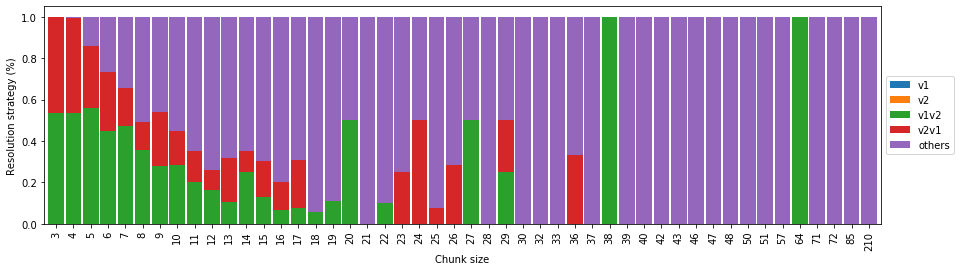

In [81]:
import importlib
importlib.reload(analysis_util)
max_size = int(chunks_of_interest['chunk_size'].max())
plot_data = analysis_util.get_strategies_plot_data(chunks_of_interest, v1_only, v2_only, v1v2, v2v1, 0, max_size, 1, -1, 'chunk_size')
df_plot = pd.DataFrame(plot_data, columns=['delta', 'v1', 'v2', 'v1v2', 'v2v1', 'others'])
# display(df_plot.tail())
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='delta', stacked=True, width=0.90, ax = ax)
ax.set_ylabel("Resolution strategy (%)")
ax.set_xlabel("Chunk size")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

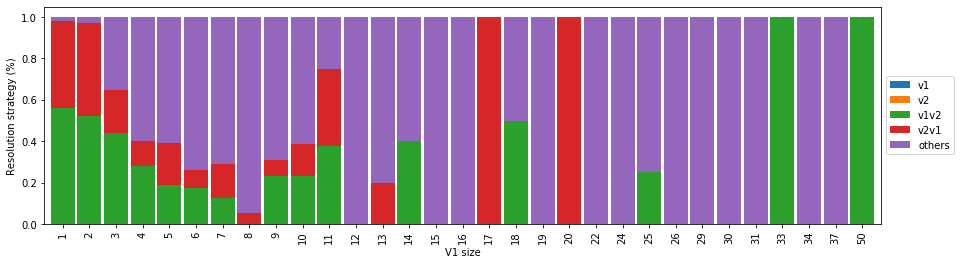

In [82]:
import importlib
importlib.reload(analysis_util)
variable = 'v1_size'
max_size = int(chunks_of_interest[variable].max())
plot_data = analysis_util.get_strategies_plot_data(chunks_of_interest, v1_only, v2_only, v1v2, v2v1, 0, max_size, 1, -1, variable)
df_plot = pd.DataFrame(plot_data, columns=['delta', 'v1', 'v2', 'v1v2', 'v2v1', 'others'])
# display(df_plot.tail())
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='delta', stacked=True, width=0.90, ax = ax)
ax.set_ylabel("Resolution strategy (%)")
ax.set_xlabel("V1 size")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

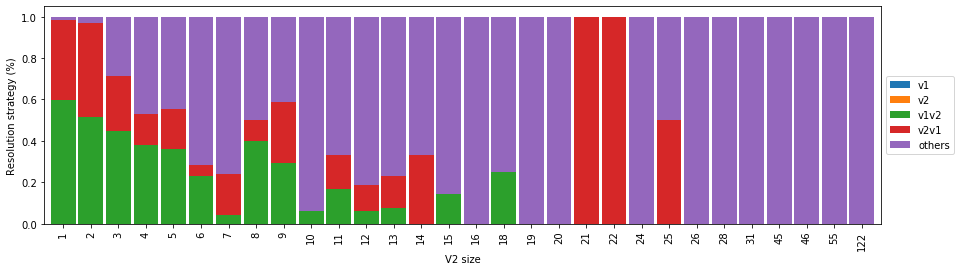

In [83]:
import importlib
importlib.reload(analysis_util)
variable = 'v2_size'
max_size = int(chunks_of_interest[variable].max())
plot_data = analysis_util.get_strategies_plot_data(chunks_of_interest, v1_only, v2_only, v1v2, v2v1, 0, max_size, 1, -1, variable)
df_plot = pd.DataFrame(plot_data, columns=['delta', 'v1', 'v2', 'v1v2', 'v2v1', 'others'])
# display(df_plot.tail())
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='delta', stacked=True, width=0.90, ax = ax)
ax.set_ylabel("Resolution strategy (%)")
ax.set_xlabel("V2 size")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

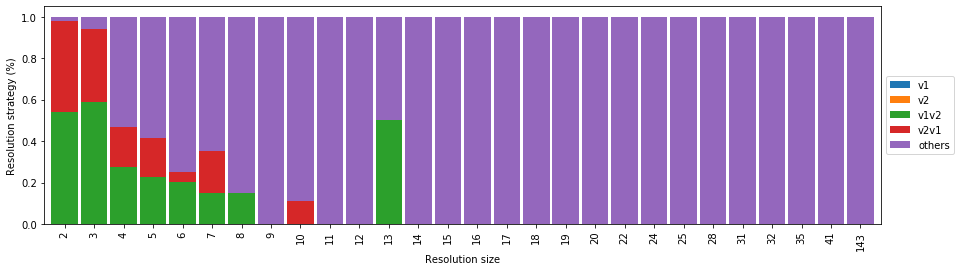

In [84]:
import importlib
importlib.reload(analysis_util)
max_size = int(chunks_of_interest['resolution_size'].max())
plot_data = analysis_util.get_strategies_plot_data(chunks_of_interest, v1_only, v2_only, v1v2, v2v1, 0, max_size, 1, -1, 'resolution_size')
df_plot = pd.DataFrame(plot_data, columns=['delta', 'v1', 'v2', 'v1v2', 'v2v1', 'others'])
# display(df_plot.tail())
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='delta', stacked=True, width=0.90, ax = ax)
ax.set_ylabel("Resolution strategy (%)")
ax.set_xlabel("Resolution size")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### Sample of v1v2 chunks

In [45]:
sample_v1v2 = v1v2.sample(4, random_state = 42)
sample_v1v2.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
5739,1035952,0.5,0.5,0.5,0.5,0.0,v1 v2,0,1,0.00,50.0,1,2,1.0,True,3,2
7142,1094913,0.5,0.5,0.5,0.5,0.0,v1 v2,1,1,50.00,50.0,2,2,0.0,True,4,2
6036,1046946,0.5,0.5,0.5,0.5,0.0,v1 v2,0,1,0.00,50.0,1,2,1.0,True,3,2
11986,1412215,0.5,0.5,0.5,0.5,0.0,v1 v2,2,1,66.67,50.0,3,2,-1.0,True,5,2


### Chunk 1

In [33]:
chunk1 = Chunk(int(sample_v1v2.iloc[0]['chunk_id']))
print(chunk1.get_conflict_text())

import org.spout.api.geo.WorldSource;
import org.spout.api.geo.cuboid.Block;
import org.spout.api.geo.cuboid.Chunk;
<<<<<<<
import org.spout.math.vector.Vector3;
import org.spout.api.geo.cuboid.Region;
import org.spout.api.math.Vector3;
>>>>>>>
import org.spout.api.util.StringUtil;

/**




In [34]:
print(chunk1.resolution)

import org.spout.api.geo.WorldSource;
import org.spout.api.geo.cuboid.Block;
import org.spout.api.geo.cuboid.Chunk;
import org.spout.math.vector.Vector3;
import org.spout.api.geo.cuboid.Region;
import org.spout.api.util.StringUtil;

/**



In [35]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk1.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

In [36]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk1.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

importorg.spout.api.math.Vector3;


### Chunk 2

In [37]:
chunk2 = Chunk(int(sample_v1v2.iloc[1]['chunk_id']))
print(chunk2.get_conflict_text())

					}

					TextView nameView = (TextView) waypointView.findViewById(R.id.name);
<<<<<<<
					if (StringUtils.isBlank(wpt.name)) {
						nameView.setText(cgBase.formatCoordinate(wpt.latitude, "lat", true) + " | " + cgBase.formatCoordinate(wpt.longitude, "lon", true));
					if (wpt.name.trim().length() == 0) {
						nameView.setText(cgBase.formatCoords(wpt.latitude, wpt.longitude, true));
>>>>>>>
					} else {
						// avoid HTML parsing
						if (wpt.name.indexOf('<') >= 0 || wpt.name.indexOf('&') >= 0) {




In [38]:
print(chunk2.resolution)

					}

					TextView nameView = (TextView) waypointView.findViewById(R.id.name);
					if (StringUtils.isBlank(wpt.name)) {
						nameView.setText(cgBase.formatCoords(wpt.latitude, wpt.longitude, true));
					} else {
						// avoid HTML parsing
						if (wpt.name.indexOf('<') >= 0 || wpt.name.indexOf('&') >= 0) {



In [39]:
resolution = chunk2.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk2.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

nameView.setText(cgBase.formatCoordinate(wpt.latitude,"lat",true)+"|"+cgBase.formatCoordinate(wpt.longitude,"lon",true));


In [40]:
resolution = chunk2.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk2.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

if(wpt.name.trim().length()==0){


### Chunk 3

In [46]:
chunk3 = Chunk(int(sample_v1v2.iloc[2]['chunk_id']))
print(chunk3.get_conflict_text())

      } else {
        int result = context.currentScope().allocateTempValue();
        Access A = new Access(name, null, result);
<<<<<<<
        context.cfg().addInstruction(new AstLexicalRead(context.cfg().currentInstruction, A));
        context.cfg().addInstruction(new AstLexicalRead(A));
        addAccess(context, context.top(), A);
>>>>>>>
        return result;
      }





In [47]:
print(chunk3.resolution)

      } else {
        int result = context.currentScope().allocateTempValue();
        Access A = new Access(name, null, result);
        context.cfg().addInstruction(new AstLexicalRead(context.cfg().currentInstruction, A));
        addAccess(context, context.top(), A);
        return result;
      }




In [48]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk3.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

In [49]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk3.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

context.cfg().addInstruction(newAstLexicalRead(A));


### Chunk 4

In [50]:
chunk4 = Chunk(int(sample_v1v2.iloc[3]['chunk_id']))
print(chunk4.get_conflict_text())

              if (entries.length == 3) {
                String lang = entries[2].replace('\'', ' ').trim();
                if (lang.matches("[a-z]{2}_[A-Z]{2}")) {
<<<<<<<
                  if (new FileCI(rootDir, "lang" + File.separator + lang).exists()) {
                    bgeeLang = lang;
                    break;
                  if (new File(rootDir, "lang" + File.separator + lang).exists()) {
                    return lang;
>>>>>>>
                  }
                }
              }




In [51]:
print(chunk4.resolution)

              if (entries.length == 3) {
                String lang = entries[2].replace('\'', ' ').trim();
                if (lang.matches("[a-z]{2}_[A-Z]{2}")) {
                  if (new FileCI(rootDir, "lang" + File.separator + lang).exists()) {
                    return lang;
                  }
                }
              }



In [52]:
resolution = chunk4.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk4.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

bgeeLang=lang;
break;


In [53]:
resolution = chunk4.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk4.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

if(newFile(rootDir,"lang"+File.separator+lang).exists()){


### Sample of v2v1 chunks

In [54]:
sample_v2v1 = v2v1.sample(4, random_state = 42)
sample_v2v1.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
8352,1136204,0.5,0.5,0.5,0.5,0.0,v2 v1,1,2,50.0,66.67,2,3,1.0,True,6,2
11061,1364427,0.5,0.5,0.5,0.5,0.0,v2 v1,1,2,50.0,66.67,2,3,1.0,True,6,2
9176,1165732,0.5,0.5,0.5,0.5,0.0,v2 v1,1,1,50.0,50.00,2,2,0.0,True,4,3
1391,821044,0.5,0.5,0.5,0.5,0.0,v2 v1,0,2,0.0,66.67,1,3,2.0,True,4,2


### Chunk 1

In [55]:
chunk1 = Chunk(int(sample_v2v1.iloc[0]['chunk_id']))
print(chunk1.get_conflict_text())

        configMap.put(FelixConstants.SYSTEMBUNDLE_ACTIVATORS_PROP, activators);
    }

<<<<<<<
    private void initCheckerThread(final String pluginsDir) {
        bundleInfos = new HashMap<String, BundleInfo>();
    private void initCheckerThread() {
        fileTimes = new HashMap<String, Long>();
        bundleFiles = new HashMap<Long, String>();
        
>>>>>>>
        LOGGER.info("Starting OSGi checker thread");
        if (executor != null && !executor.isShutdown()) {
            executor.shutdown();




In [56]:
print(chunk1.resolution)

        configMap.put(FelixConstants.SYSTEMBUNDLE_ACTIVATORS_PROP, activators);
    }

    private void initCheckerThread() {
        bundleInfos = new HashMap<String, BundleInfo>();
        LOGGER.info("Starting OSGi checker thread");
        if (executor != null && !executor.isShutdown()) {
            executor.shutdown();



In [57]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk1.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

privatevoidinitCheckerThread(finalStringpluginsDir){


In [58]:
resolution = chunk1.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk1.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

fileTimes=newHashMap<String,Long>();
bundleFiles=newHashMap<Long,String>();


### Chunk 2

In [59]:
chunk2 = Chunk(int(sample_v2v1.iloc[1]['chunk_id']))
print(chunk2.get_conflict_text())

     *                                 requires authorization. Check the constructor arguments.
     * @throws RedmineException
     */
<<<<<<<
    public Project createProject(Project project) throws IOException, AuthenticationException, RedmineException, NotFoundException {
        URI uri = getURIConfigurator().createURI("projects." + URI_SUFFIX, new BasicNameValuePair("include", "trackers"));
    public Project createProject(Project project) throws RedmineException {
        // see bug http://www.redmine.org/issues/7184
        URI uri = getURIConfigurator().createURI("projects.xml", new BasicNameValuePair("include", "trackers"));

>>>>>>>
        HttpPost httpPost = new HttpPost(uri);
        String body = RedmineJSONBuilder.toJSON(project);
        setEntity(httpPost, body);




In [60]:
print(chunk2.resolution)

     *                                 requires authorization. Check the constructor arguments.
     * @throws RedmineException
     */
    public Project createProject(Project project) throws RedmineException {
        URI uri = getURIConfigurator().createURI("projects." + URI_SUFFIX, new BasicNameValuePair("include", "trackers"));
        HttpPost httpPost = new HttpPost(uri);
        String body = RedmineJSONBuilder.toJSON(project);
        setEntity(httpPost, body);



In [61]:
resolution = chunk2.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk2.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

publicProjectcreateProject(Projectproject)throwsIOException,AuthenticationException,RedmineException,NotFoundException{


In [62]:
resolution = chunk2.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk2.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

//seebughttp://www.redmine.org/issues/7184
URIuri=getURIConfigurator().createURI("projects.xml",newBasicNameValuePair("include","trackers"));


### Chunk 3

In [63]:
chunk3 = Chunk(int(sample_v2v1.iloc[2]['chunk_id']))
print(chunk3.get_conflict_text())

    VOMSGroup g = groupById(groupId);

    GroupMembershipRequest req = reqDAO.createGroupMembershipRequest(
<<<<<<<
      getModel(), g, getDefaultFutureDate());
    EventManager.instance().dispatch(new GroupMembershipSubmittedEvent(req, getHomeURL()));
      getModel(), reason, g, getDefaultFutureDate());
    EventManager.dispatch(new GroupMembershipSubmittedEvent(req, getHomeURL()));
>>>>>>>

    refreshPendingRequests();





In [64]:
print(chunk3.resolution)

    VOMSGroup g = groupById(groupId);

    GroupMembershipRequest req = reqDAO.createGroupMembershipRequest(
      getModel(), reason, g, getDefaultFutureDate());

    EventManager.instance().dispatch(new GroupMembershipSubmittedEvent(req, getHomeURL()));

    refreshPendingRequests();




In [65]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk3.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

getModel(),g,getDefaultFutureDate());


In [66]:
resolution = chunk3.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk3.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

EventManager.dispatch(newGroupMembershipSubmittedEvent(req,getHomeURL()));


### Chunk 4

In [67]:
chunk4 = Chunk(int(sample_v2v1.iloc[3]['chunk_id']))
print(chunk4.get_conflict_text())

import ro.isdc.wro.model.resource.Resource;
import ro.isdc.wro.model.resource.ResourceType;
import ro.isdc.wro.model.resource.SupportedResourceType;
<<<<<<<
import ro.isdc.wro.model.resource.processor.ResourceProcessor;
import ro.isdc.wro.model.resource.processor.Destroyable;
import ro.isdc.wro.model.resource.processor.ResourcePostProcessor;
import ro.isdc.wro.model.resource.processor.ResourcePreProcessor;
>>>>>>>
import ro.isdc.wro.util.ObjectFactory;






In [68]:
print(chunk4.resolution)

import ro.isdc.wro.model.resource.Resource;
import ro.isdc.wro.model.resource.ResourceType;
import ro.isdc.wro.model.resource.SupportedResourceType;
import ro.isdc.wro.model.resource.processor.Destroyable;
import ro.isdc.wro.model.resource.processor.ResourceProcessor;
import ro.isdc.wro.util.ObjectFactory;





In [69]:
resolution = chunk4.get_clean_solution()
resolution = remove_empty_lines(resolution)
v1 = normalize_lines(chunk4.v1.splitlines())
v1 = remove_empty_lines(v1)
analysis_util.print_missing_lines(v1, resolution)

In [70]:
resolution = chunk4.get_clean_solution()
resolution = remove_empty_lines(resolution)
v2 = normalize_lines(chunk4.v2.splitlines())
v2 = remove_empty_lines(v2)
analysis_util.print_missing_lines(v2, resolution)

importro.isdc.wro.model.resource.processor.ResourcePostProcessor;
importro.isdc.wro.model.resource.processor.ResourcePreProcessor;
